In [1]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pandas DataFrame

In [2]:
# Read CSV file and create a Pandas dataframe
df = pd.read_csv("Resources/COVID19_data.csv")

In [3]:
# View first 5 rows and column headers of new dataframe
df.head()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,12/20/2020,02/01/2020,12/19/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,181.0,187.0,NaN
1,12/20/2020,02/01/2020,12/19/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,903.0,920.0,NaN
2,12/20/2020,02/01/2020,12/19/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2316.0,2360.0,NaN
3,12/20/2020,02/01/2020,12/19/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,6598.0,6765.0,NaN
4,12/20/2020,02/01/2020,12/19/2020,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,16398.0,16779.0,NaN


In [4]:
# Replace NaN/blank entries with 0
df["COVID-19 Deaths"].fillna(0, inplace=True)

In [5]:
# Groupby "COVID-19 Deaths" to find total for each condition
df = df.groupby("Condition")["COVID-19 Deaths"].sum().reset_index()

In [6]:
# Convert "COVID-19 Deaths" column to integers
df["COVID-19 Deaths"] = df["COVID-19 Deaths"].astype("int")

In [7]:
# Rank totals deaths in descending order
df = df.sort_values(["COVID-19 Deaths"], ascending=False)

In [8]:
# Drop rows for "COVID-19" and "All other conditions and causes (residual)" - not helpful for determining top underlying conditionss
df = df.loc[~((df["Condition"] == "COVID-19") | (df["Condition"] == "All other conditions and causes (residual)")),:]

In [9]:
# Reset index
df = df.reset_index(drop=True)

In [10]:
# Make index start with 1 (so that output dataframe will display rankings next to each condition)
df.index = df.index + 1

In [11]:
# Isolate top 10 conditions and create new variable to store new dataframe
top_10 = df.iloc[0:10].copy()

In [12]:
# Format totals in "COVID-19 Deaths" column with commas 
top_10["COVID-19 Deaths"] = top_10["COVID-19 Deaths"].apply(lambda x : "{:,}".format(x))

### Top 10 Underlying Conditions:

In [13]:
# Display top 10 underlying conditions
top_10

,Condition,COVID-19 Deaths
1,Influenza and pneumonia,"490,237"
2,Respiratory failure,"400,659"
3,Hypertensive diseases,"235,729"
4,Diabetes,"183,168"
5,Adult respiratory distress syndrome,"134,405"
6,Cardiac arrest,"129,342"
7,Vascular and unspecified dementia,"126,968"
8,Ischemic heart disease,"124,642"
9,Sepsis,"105,459"
10,Chronic lower respiratory diseases,"100,469"


# Matplotlib Pie Chart

In [14]:
#  Isolate the top 5 conditions to use for pie chart
top5 = df.iloc[0:5].copy()

In [15]:
# Save CONDITIONS for each of the top 5 conditions as list
conditions_top5 = top5["Condition"]

In [16]:
# Save DEATHS for each of the top 5 conditions as list
deaths_top5 = top5["COVID-19 Deaths"]

In [17]:
# Esthetics
colors = ["lightcoral", "gold", "lightskyblue", "red", "green"]
explode = (0.1, 0, 0)

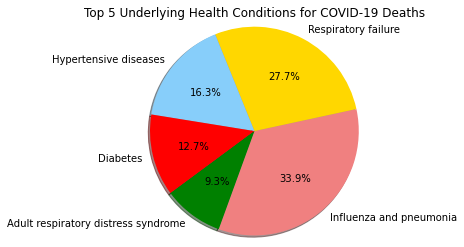

In [18]:
#  Create pie chart
plt.pie(deaths_top5, labels=conditions_top5, colors=colors, autopct="%1.1f%%", shadow=True, startangle=250, radius=1.2)

# Chart title
plt.title("Top 5 Underlying Health Conditions for COVID-19 Deaths")

# Show chart
plt.show()